# Heart Disease Prediction using Neural Networks

This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified for their heart disease diagnosis. This project utilizes a dataset of 303 patients. 

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Using TensorFlow backend.


Python: 3.7.4 (v3.7.4:e09359112e, Jul  8 2019, 14:54:52) 
[Clang 6.0 (clang-600.0.57)]
Pandas: 1.0.1
Numpy: 1.18.3
Sklearn: 0.22.1
Matplotlib: 3.1.1
Keras: 2.3.1


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### 1. Importing the Dataset

There are overall 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. We focus on a subset of 14 attributes. Let's talk about each feature and the target output more concretely, the source of information for the following section is https://towardsdatascience.com/heart-disease-prediction-73468d630cfc.

* age: The age of patient at the time of data entry. Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.

* sex: equivalent to gender - 1 = male / 0 = female. Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

* cp: Chest pain type - 1 = typical angina / 2 = atypical angina / 3 = non—anginal pain / 4 = asymptotic. Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back.

* restbps: Resting blood pressure in mmHg. Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.

* chol: Serum cholesterol in mg/dl. A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.

* fbs: Fasting blood sugar - compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then: 1 (true), else: 0 (false). Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.

* restecg: Resting ECG - 0 = normal / 1 = having ST-T wave abnormality / 2 = left ventricular hyperthrophy. You may need an ECG test if you have risk factors for heart disease such as high blood pressure, or symptoms such as palpitations or chest pain. Or you may need it if you already have heart disease.

* thalach: Max heart rate achieved. The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

* exang: Exercise induced angina - 1 = yes / 0 = no. The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands.

* oldpeak: ST depression induced by exercise relative to rest. 

* slope: Peak exercise ST segment - 1 = upsloping / 2 = flat / 3 = downsloping

* ca: Number of major vessels (0–3) colored by flourosopy

* thal: Thalassemia - 3 = normal / 6 = fixed defect / 7 = reversible defect

* class: Target output - 0 = no heart disease / 1-4 = present heart disease

In [22]:
url = "processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'restbps', 'chol',
                'fbs', 'restecg', 'thalach', 'exang', 
                'oldpeak', 'slope', 'ca', 'thal',
                'class']

cleveland = pd.read_csv(url, names=column_names)
cleveland

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


We need to check if there are missing data, indicated with a question mark, as you can see in the row with index 302. They must be converted into `NaN`.

In [23]:
data = cleveland[~cleveland.isin(['?'])]
data

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [24]:
data = data.dropna(axis=0)
data.shape

(297, 14)

6 rows could be removed. We have 2 features (`ca` and `thal`) which are not numeric data. They need to be converted into numeric data.

In [25]:
print(data.dtypes)

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
class        int64
dtype: object


In [26]:
data = data.apply(pd.to_numeric)
data.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
class        int64
dtype: object

As always, it can be helpful and interesting looking into statistics of each feature.

* The oldest person is 77, while the youngest person is 29 years old. The average age is 54 with a standard deviation of 9. 75% of the individuals are younger than 61 years old.
* There are more males in the dataset than females.
* It is very unhealthy to have a resting blood pressure of 200 at maximum, as well as a cholesterol of 564, regardless of the likelihood.
* The fasting blood sugar is 0.14 on average, while its range is between 0 and 1.

There are more observations, I will leave it like this.

In [27]:
data.describe()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Showing the distribution gives us more information. The occurrence of positive class seems to equal the accumulated occurrence of negative classes. Additionally, the most features seem to be categorical according to their distribution.

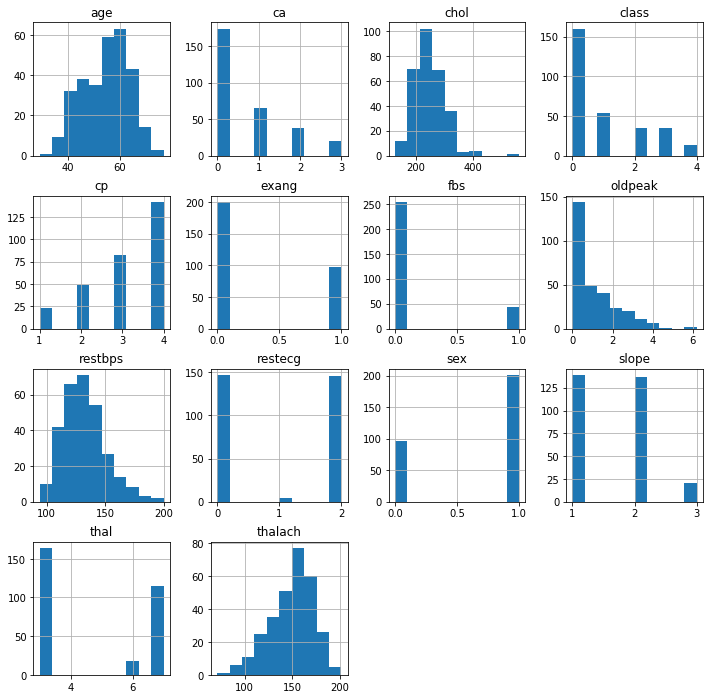

In [29]:
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

The class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). We will need to convert our class data to categorical labels by applying one-hot encoding. For example, the label 2 will become [0, 0, 1, 0, 0].

In [41]:
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (237, 13)
y_train shape: (237,)
X_test shape: (60, 13)
y_test shape: (60,)


In [42]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print("Example of one-hot encoding: {}".format(Y_train[0]))

(237, 5)
Example of one-hot encoding: [0. 1. 0. 0. 0.]


### 3. Building and Training the Neural Network

In [47]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


Having a total number of 173 parameters, we see that the accuracy and loss are not fluctuating after approx. 55 epochs, means that the model is not able to be furtherly optimized. I tried to make the model a bit more complex by adding more new neurons, but it didn't improve significantly. The achieved training accuracy is around 64% only, while the loss is around 0.90.

In [48]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 593us/step - loss: 1.6142 - accuracy: 0.1308
Epoch 2/100
237/237 [==============================] - 0s 282us/step - loss: 1.5259 - accuracy: 0.1013
Epoch 3/100
237/237 [==============================] - 0s 175us/step - loss: 1.5007 - accuracy: 0.4346
Epoch 4/100
237/237 [==============================] - 0s 157us/step - loss: 1.4755 - accuracy: 0.5527
Epoch 5/100
237/237 [==============================] - 0s 163us/step - loss: 1.4508 - accuracy: 0.5527
Epoch 6/100
237/237 [==============================] - 0s 183us/step - loss: 1.4304 - accuracy: 0.5527
Epoch 7/100
237/237 [==============================] - 0s 154us/step - loss: 1.4103 - accuracy: 0.5527
Epoch 8/100
237/237 [==============================] - 0s 174us/step - loss: 1.3881 - accuracy: 0.5527
Epoch 9/100
237/237 [==============================] - 0s 155us/step - loss: 1.3752 - accuracy: 0.5527
Epoch 10/100
237/237 [==============================] - 0s 150us/step - l

237/237 [==============================] - 0s 182us/step - loss: 0.9339 - accuracy: 0.6245
Epoch 80/100
237/237 [==============================] - 0s 154us/step - loss: 0.9243 - accuracy: 0.6329
Epoch 81/100
237/237 [==============================] - 0s 155us/step - loss: 0.9234 - accuracy: 0.6414
Epoch 82/100
237/237 [==============================] - 0s 140us/step - loss: 0.9196 - accuracy: 0.6371
Epoch 83/100
237/237 [==============================] - 0s 163us/step - loss: 0.9223 - accuracy: 0.6245
Epoch 84/100
237/237 [==============================] - 0s 175us/step - loss: 0.9670 - accuracy: 0.6329
Epoch 85/100
237/237 [==============================] - 0s 164us/step - loss: 0.9211 - accuracy: 0.6287
Epoch 86/100
237/237 [==============================] - 0s 195us/step - loss: 0.9141 - accuracy: 0.6371
Epoch 87/100
237/237 [==============================] - 0s 166us/step - loss: 0.9247 - accuracy: 0.6287
Epoch 88/100
237/237 [==============================] - 0s 145us/step - loss:

### 4. Improving Results - A Binary Classification Problem

Thinking logically, a binary classification task is surely easier to train for. Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [49]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1]


In [50]:
def create_binary_model():
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


We see way better results for training data than before, as I expected.

In [51]:
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 0s 873us/step - loss: 0.6972 - accuracy: 0.5232
Epoch 2/100
237/237 [==============================] - 0s 257us/step - loss: 0.6810 - accuracy: 0.5654
Epoch 3/100
237/237 [==============================] - 0s 199us/step - loss: 0.6726 - accuracy: 0.6245
Epoch 4/100
237/237 [==============================] - 0s 178us/step - loss: 0.6578 - accuracy: 0.5949
Epoch 5/100
237/237 [==============================] - 0s 162us/step - loss: 0.6362 - accuracy: 0.6878
Epoch 6/100
237/237 [==============================] - 0s 174us/step - loss: 0.6047 - accuracy: 0.6793
Epoch 7/100
237/237 [==============================] - 0s 186us/step - loss: 0.5925 - accuracy: 0.6793
Epoch 8/100
237/237 [==============================] - 0s 163us/step - loss: 0.5592 - accuracy: 0.7300
Epoch 9/100
237/237 [==============================] - 0s 165us/step - loss: 0.5610 - accuracy: 0.7131
Epoch 10/100
237/237 [==============================] - 0s 168us/step - l

237/237 [==============================] - 0s 235us/step - loss: 0.3574 - accuracy: 0.8692
Epoch 80/100
237/237 [==============================] - 0s 334us/step - loss: 0.3422 - accuracy: 0.8776
Epoch 81/100
237/237 [==============================] - 0s 153us/step - loss: 0.3571 - accuracy: 0.8734
Epoch 82/100
237/237 [==============================] - 0s 157us/step - loss: 0.3578 - accuracy: 0.8439
Epoch 83/100
237/237 [==============================] - 0s 150us/step - loss: 0.3503 - accuracy: 0.8692
Epoch 84/100
237/237 [==============================] - 0s 154us/step - loss: 0.3541 - accuracy: 0.8776
Epoch 85/100
237/237 [==============================] - 0s 147us/step - loss: 0.3474 - accuracy: 0.8608
Epoch 86/100
237/237 [==============================] - 0s 148us/step - loss: 0.3743 - accuracy: 0.8523
Epoch 87/100
237/237 [==============================] - 0s 146us/step - loss: 0.3634 - accuracy: 0.8734
Epoch 88/100
237/237 [==============================] - 0s 148us/step - loss:

### 5. Results and Metrics

The evaluation metrics should be applied on the testing dataset, verifying how well the models generalize to test data. The test accuracy for the multi-classifier is below the training accuracy. Having an accuracy of 50% is not satisfying, although it is better than guessing without knowledge.

In [52]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.5
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        11
           3       0.21      0.80      0.33         5

    accuracy                           0.50        60
   macro avg       0.22      0.42      0.27        60
weighted avg       0.33      0.50      0.39        60



/Users/admin/enyangEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The binary classifier achieves a better test accuracy, but looking at the precision and recall score, there are also tendencies observed for the positive and negative classes. The models which have been trained so far, are not really usable for serious purposes.

In [53]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.6833333333333333
              precision    recall  f1-score   support

           0       0.62      0.90      0.73        29
           1       0.83      0.48      0.61        31

    accuracy                           0.68        60
   macro avg       0.73      0.69      0.67        60
weighted avg       0.73      0.68      0.67        60



### 6. Potential Follow-Up Tasks

Maybe it would be a good way to reduce the number of features in order to simplify the learning for the model. How about applying the `SelectKBest()` class to extract top 10 best features, if we are not able to enlarge the dataset?